## Initial EDA

load in the data and first look at our target variable


In [1]:
# standard and modeling imports

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import copy
#from Modules import *
sns.set()
%matplotlib inline
import imblearn
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score,  KFold
from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [3]:
df = pd.read_excel('06608_extract.xls', header=0, skiprows=0)

df.head()

,Y,Citizen Less than High School Education,Citizen High School Graduate,Citizen Some College Education,Citizen College Degree,Citizen Graduate or Professional Degree,Citizen No Income,"Citizen Income $1-$9,999","Citizen Income $10,000-$14,999","Citizen Income $75,000 +",...,White Race,Black Race,Native American Race,Asian Race,Pacific Islander Race,Other Race Alone,Hispanic or Latino,Male Median Age,Female Median Age,Total Households
0,10006372.8,2906,3090,1887,373,88,1670,2648,1062,439,...,4526,84,216,16,3547,760,5055,28.1,30.8,4414


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 21 columns):
Y                                           1 non-null float64
Citizen Less than High School  Education    1 non-null int64
Citizen High School  Graduate               1 non-null int64
Citizen Some College  Education             1 non-null int64
Citizen College Degree                      1 non-null int64
Citizen Graduate or Professional Degree     1 non-null int64
 Citizen No Income                          1 non-null int64
 Citizen Income $1-$9,999                   1 non-null int64
Citizen Income $10,000-$14,999              1 non-null int64
Citizen Income $75,000 +                    1 non-null int64
One Race Population                         1 non-null int64
White Race                                  1 non-null int64
Black Race                                  1 non-null int64
Native American Race                        1 non-null int64
Asian Race                                 

In [5]:
#find out missing values
names = []
value = []
for col in df.columns:
    names.append(col)
    value.append(df[col].isnull().sum())
    print("number of missing values: ", names[-1], value[-1],"""     """, "Percentage of missing values:", names[-1], round((value[-1]/32936)*100))  

number of missing values:  Y 0       Percentage of missing values: Y 0.0
number of missing values:  Citizen Less than High School  Education 0       Percentage of missing values: Citizen Less than High School  Education 0.0
number of missing values:  Citizen High School  Graduate 0       Percentage of missing values: Citizen High School  Graduate 0.0
number of missing values:  Citizen Some College  Education 0       Percentage of missing values: Citizen Some College  Education 0.0
number of missing values:  Citizen College Degree  0       Percentage of missing values: Citizen College Degree  0.0
number of missing values:  Citizen Graduate or Professional Degree 0       Percentage of missing values: Citizen Graduate or Professional Degree 0.0
number of missing values:   Citizen No Income 0       Percentage of missing values:  Citizen No Income 0.0
number of missing values:   Citizen Income $1-$9,999 0       Percentage of missing values:  Citizen Income $1-$9,999 0.0
number of missing va

In [6]:
#split my data
#df = df.astype('float32')
X = df.drop(columns = 'Y')

y = df.Y

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 21 columns):
Y                                           1 non-null float64
Citizen Less than High School  Education    1 non-null int64
Citizen High School  Graduate               1 non-null int64
Citizen Some College  Education             1 non-null int64
Citizen College Degree                      1 non-null int64
Citizen Graduate or Professional Degree     1 non-null int64
 Citizen No Income                          1 non-null int64
 Citizen Income $1-$9,999                   1 non-null int64
Citizen Income $10,000-$14,999              1 non-null int64
Citizen Income $75,000 +                    1 non-null int64
One Race Population                         1 non-null int64
White Race                                  1 non-null int64
Black Race                                  1 non-null int64
Native American Race                        1 non-null int64
Asian Race                                 

In [8]:
df.corr

<bound method DataFrame.corr of             Y  Citizen Less than High School  Education  \
0  10006372.8                                      2906   

   Citizen High School  Graduate  Citizen Some College  Education  \
0                           3090                             1887   

   Citizen College Degree   Citizen Graduate or Professional Degree  \
0                      373                                       88   

    Citizen No Income   Citizen Income $1-$9,999  \
0                1670                       2648   

   Citizen Income $10,000-$14,999  Citizen Income $75,000 +   \
0                            1062                        439   

         ...         White Race  Black Race  Native American Race  Asian Race  \
0        ...               4526          84                   216          16   

   Pacific Islander Race  Other Race Alone  Hispanic or Latino  \
0                   3547               760                5055   

   Male Median Age  Female Median Age

In [7]:
corr=df.corr()
corr = (corr)
plt.figure(figsize=(28,28))
sns.heatmap(corr, cbar = True, square = True,  cmap = sns.diverging_palette(220, 10), annot=True, fmt= '.2f',annot_kws={'size': 15},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set_title('Heatmap Correlation Matrix')

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 2016x2016 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb45ec7e320>,
      dtype=object)

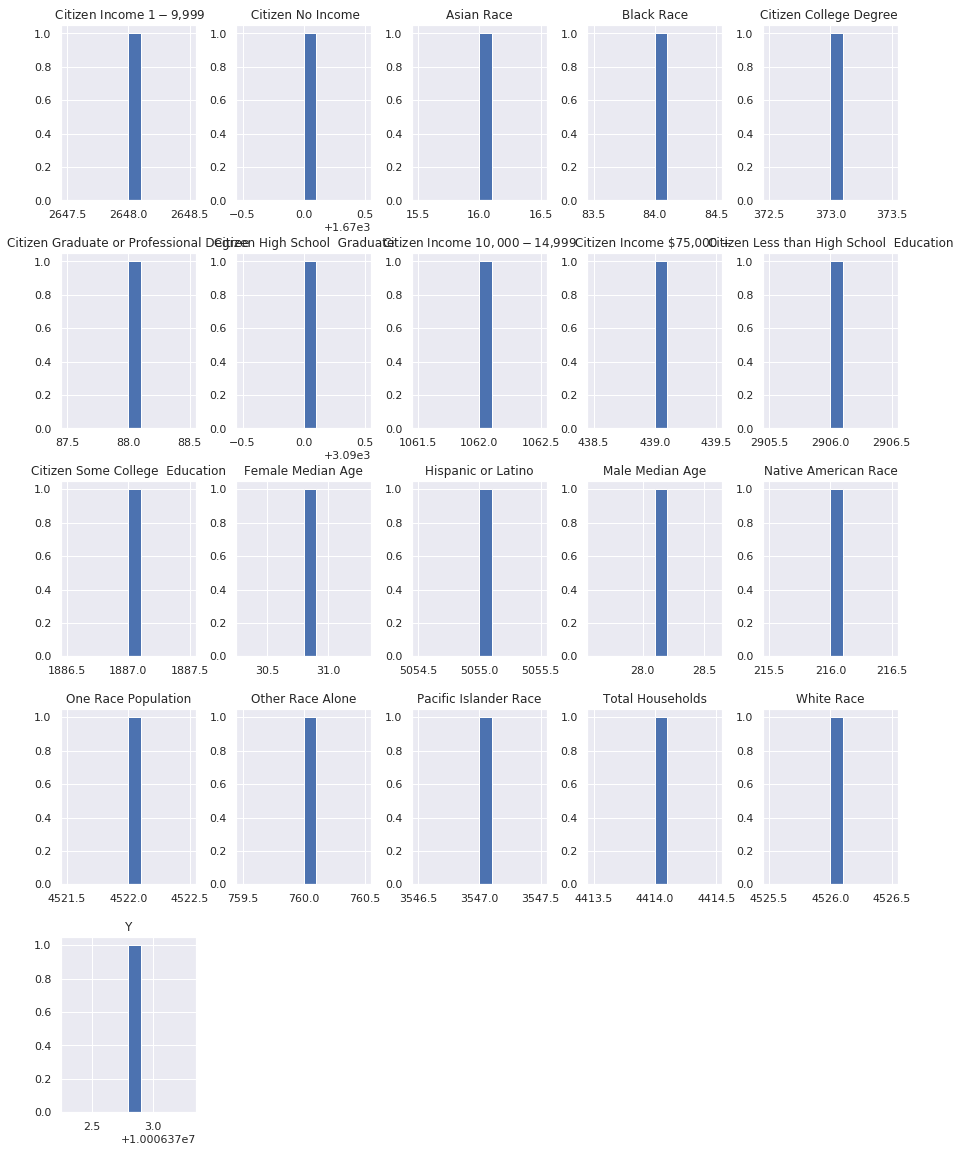

In [9]:
df.hist(figsize = (15,20))

In [10]:
df.columns

Index(['Y', 'Citizen Less than High School  Education',
       'Citizen High School  Graduate', 'Citizen Some College  Education',
       'Citizen College Degree ', 'Citizen Graduate or Professional Degree',
       ' Citizen No Income', ' Citizen Income $1-$9,999',
       'Citizen Income $10,000-$14,999', 'Citizen Income $75,000 + ',
       'One Race Population', 'White Race', 'Black Race',
       'Native American Race', 'Asian Race', 'Pacific Islander Race',
       'Other Race Alone', 'Hispanic or Latino', 'Male Median Age',
       'Female Median Age', 'Total Households'],
      dtype='object')

In [11]:
print(names)

['Y', 'Citizen Less than High School  Education', 'Citizen High School  Graduate', 'Citizen Some College  Education', 'Citizen College Degree ', 'Citizen Graduate or Professional Degree', ' Citizen No Income', ' Citizen Income $1-$9,999', 'Citizen Income $10,000-$14,999', 'Citizen Income $75,000 + ', 'One Race Population', 'White Race', 'Black Race', 'Native American Race', 'Asian Race', 'Pacific Islander Race', 'Other Race Alone', 'Hispanic or Latino', 'Male Median Age', 'Female Median Age', 'Total Households']


## Split the data for regressions

In [16]:
#split my data
#remove elements used to calculate Y in order to render 
X = df.drop(columns = ['Y'])
y = df['Y']


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 20 columns):
Citizen Less than High School  Education    1 non-null int64
Citizen High School  Graduate               1 non-null int64
Citizen Some College  Education             1 non-null int64
Citizen College Degree                      1 non-null int64
Citizen Graduate or Professional Degree     1 non-null int64
 Citizen No Income                          1 non-null int64
 Citizen Income $1-$9,999                   1 non-null int64
Citizen Income $10,000-$14,999              1 non-null int64
Citizen Income $75,000 +                    1 non-null int64
One Race Population                         1 non-null int64
White Race                                  1 non-null int64
Black Race                                  1 non-null int64
Native American Race                        1 non-null int64
Asian Race                                  1 non-null int64
Pacific Islander Race                       1

In [18]:
from sklearn import linear_model as lm

# fit the linear model
model = lm.LinearRegression()
results = model.fit(X,y)

# Print coefficients
print (model.intercept_,model.coef_)

10006372.8 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
#split into training and testing 75% Train and 25% test

from sklearn.model_selection import train_test_split, KFold, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 2019, test_size = .25)

# build my classifier

from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm                               #https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
#from scipy import stats

lm = LinearRegression()
lm.fit(X_train,y_train)

ValueError: With n_samples=1, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [20]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

#diabetes = datasets.load_diabetes()
#X = diabetes.data
#y = diabetes.target

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)                    #https://www.statsmodels.org/stable/regression.html - ordinary least squares (OLS), weighted least squares (WLS), generalized least squares (GLS), and feasible generalized least squares with autocorrelated AR(p) errors
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 21 Jun 2019   Prob (F-statistic):                nan
Time:                        23:34:33   Log-Likelihood:                 18.682
No. Observations:                   1   AIC:                            -35.36
Df Residuals:                       0   BIC:                            -37.36
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

/home/jupyter-sweinstein590/.local/lib/python3.6/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 1 samples were given.
  "samples were given." % int(n), ValueWarning)
/home/jupyter-sweinstein590/.local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/jupyter-sweinstein590/.local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: invalid value encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/jupyter-sweinstein590/.local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model
/home/jupyter-sweinstein590/.local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1665: RuntimeWa

In [21]:
X.head()

,Citizen Less than High School Education,Citizen High School Graduate,Citizen Some College Education,Citizen College Degree,Citizen Graduate or Professional Degree,Citizen No Income,"Citizen Income $1-$9,999","Citizen Income $10,000-$14,999","Citizen Income $75,000 +",One Race Population,White Race,Black Race,Native American Race,Asian Race,Pacific Islander Race,Other Race Alone,Hispanic or Latino,Male Median Age,Female Median Age,Total Households
0,2906,3090,1887,373,88,1670,2648,1062,439,4522,4526,84,216,16,3547,760,5055,28.1,30.8,4414


In [22]:
#use XGBoost implementation of gradient boosted decision trees designed for speed and performance to determine feature importance

import xgboost as xgb
from sklearn.metrics import mean_squared_error

#convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains. 

data_dmatrix = xgb.DMatrix(data=X,label=y)

#instantiate an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments.
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [23]:
#Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods.
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

#Compute the rmse by invoking the mean_sqaured_error function from sklearn's metrics module.
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

NameError: name 'X_train' is not defined

In [24]:
# create a hyper-parameter dictionary params which holds all the hyper-parameters and their values as key-value pairs but will exclude the n_estimators from the hyper-parameter dictionary 
#use num_boost_rounds instead.
# build a 3-fold cross validation model by invoking XGBoost's cv() method and store the results in a cv_results DataFrame.

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=2019)

XGBoostError: b'[23:35:17] src/objective/regression_obj.cu:64: Check failed: info.labels_.Size() != 0U (0 vs. 0) label set cannot be empty\n\nStack trace returned 10 entries:\n[bt] (0) /opt/tljh/user/lib/libxgboost.so(dmlc::StackTrace[abi:cxx11](unsigned long)+0x27a) [0x7fb455d0d87a]\n[bt] (1) /opt/tljh/user/lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x40) [0x7fb455d0e7e0]\n[bt] (2) /opt/tljh/user/lib/libxgboost.so(xgboost::obj::RegLossObj<xgboost::obj::LinearSquareLoss>::GetGradient(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, int, xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*)+0xee) [0x7fb455dc8a7e]\n[bt] (3) /opt/tljh/user/lib/libxgboost.so(xgboost::LearnerImpl::UpdateOneIter(int, xgboost::DMatrix*)+0x1f9) [0x7fb455d22cc9]\n[bt] (4) /opt/tljh/user/lib/libxgboost.so(XGBoosterUpdateOneIter+0x48) [0x7fb455ea6228]\n[bt] (5) /opt/tljh/user/lib/python3.6/lib-dynload/../../libffi.so.6(ffi_call_unix64+0x4c) [0x7fb4a68a6ec0]\n[bt] (6) /opt/tljh/user/lib/python3.6/lib-dynload/../../libffi.so.6(ffi_call+0x22d) [0x7fb4a68a687d]\n[bt] (7) /opt/tljh/user/lib/python3.6/lib-dynload/_ctypes.cpython-36m-x86_64-linux-gnu.so(_ctypes_callproc+0x2ce) [0x7fb4a6abd00e]\n[bt] (8) /opt/tljh/user/lib/python3.6/lib-dynload/_ctypes.cpython-36m-x86_64-linux-gnu.so(+0x13a45) [0x7fb4a6abda45]\n[bt] (9) /opt/tljh/user/bin/python(_PyObject_FastCallDict+0x8b) [0x5647b5d1987b]\n\n'

In [25]:
cv_results.head()

NameError: name 'cv_results' is not defined

In [26]:
#We can visualize how RMSE changed over training. You should observe a downward curve below.

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cv_results['test-rmse-mean'].plot()

NameError: name 'cv_results' is not defined

In [27]:
#Extract and print the final boosting round metric.

print((cv_results["test-rmse-mean"]).tail(1))

NameError: name 'cv_results' is not defined

In [28]:
#counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features 
#ordered according to how many times they appear using XGBoost plot_importance() function 

plt.rcParams['figure.figsize'] = [5, 5]
xgb.plot_importance(xg_reg)

plt.show()

XGBoostError: need to call fit or load_model beforehand